In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

## 1. Data Exploration

In [2]:
df = pd.read_csv(r'D:\Amazon Sales Analysis\amazon.csv')

In [5]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
df.shape

(1465, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [13]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [41]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,47.672367,4.096717,18307.376881
std,6950.548042,10884.467444,21.613905,0.289497,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.500000
50%,799.000000,1670.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4321.250000,63.000000,4.300000,17342.250000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [12]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

## 2. Data Cleaning and Understanding

In [15]:
df[['discounted_price','actual_price', 'discount_percentage', 'rating', 'rating_count']]

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,₹399,"₹1,099",64%,4.2,"24,269"
1,₹199,₹349,43%,4.0,"43,994"
2,₹199,"₹1,899",90%,3.9,"7,928"
3,₹329,₹699,53%,4.2,"94,363"
4,₹154,₹399,61%,4.2,"16,905"
...,...,...,...,...,...
1460,₹379,₹919,59%,4,"1,090"
1461,"₹2,280","₹3,045",25%,4.1,"4,118"
1462,"₹2,219","₹3,080",28%,3.6,468
1463,"₹1,399","₹1,890",26%,4,"8,031"


In [18]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

In [ ]:
df['actual_price'] = df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

In [20]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

In [33]:
df['rating'] = pd.to_numeric(df['rating'])

In [34]:
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'])

In [35]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [26]:
df['rating'] = df['rating'].replace('|', np.nan)

In [37]:
df[['rating', 'rating_count']].isna().sum()

rating          1
rating_count    2
dtype: int64

In [38]:
df.dropna(subset=['rating_count','rating'], inplace=True)

In [39]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [40]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [46]:
df.shape

(1462, 16)

In [47]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,47.672367,4.096717,18307.376881
std,6950.548042,10884.467444,21.613905,0.289497,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.500000
50%,799.000000,1670.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4321.250000,63.000000,4.300000,17342.250000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   int64  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

## 3. Data Visualizations and Questions

## Q1. How are product prices distributed, and are there notable outliers?

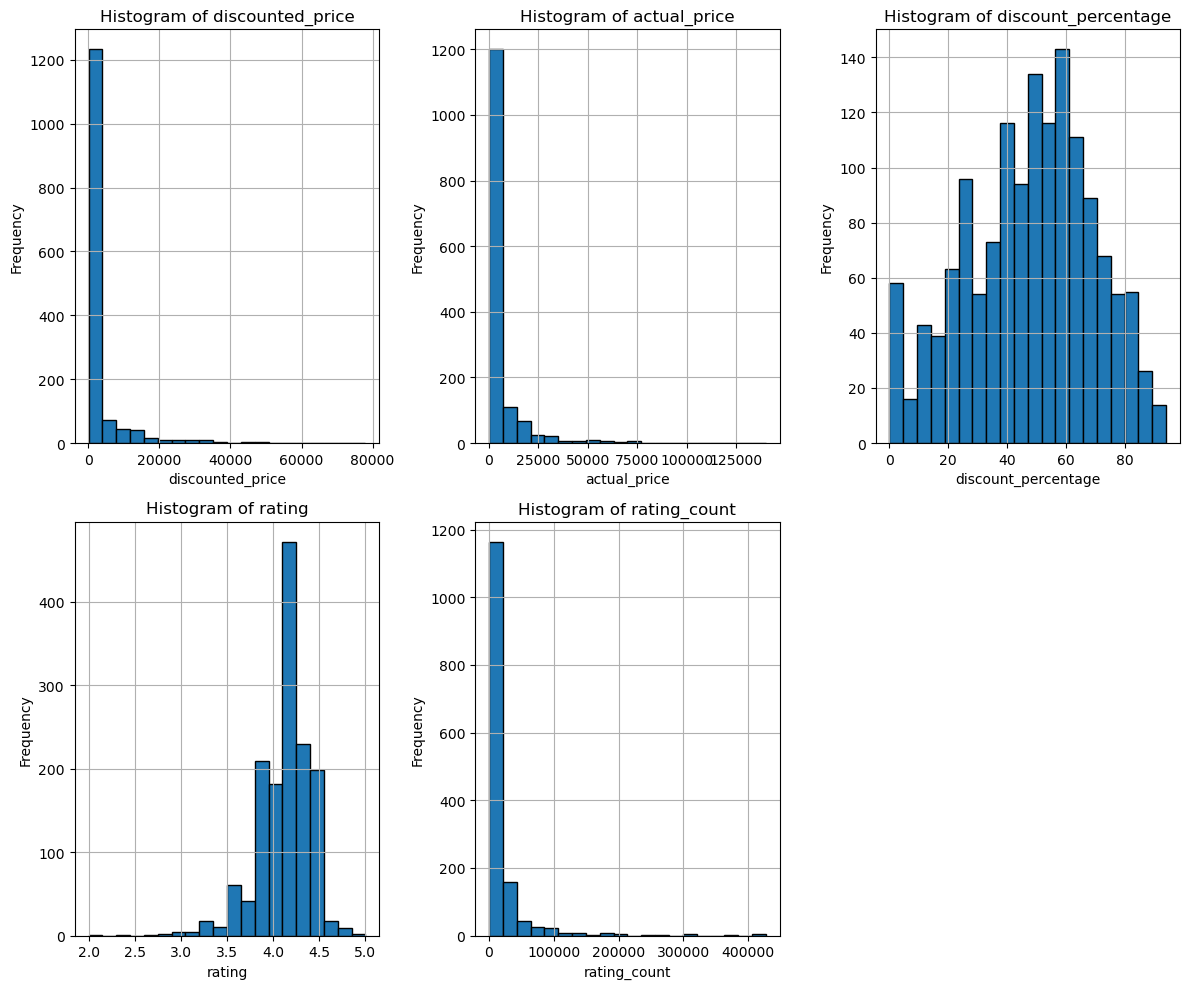

In [50]:
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    df[col].hist(bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Q2 - What is the average rating across different product categories?

In [69]:
df['category'].value_counts().head(30)

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                           231
Electronics|WearableTechnology|SmartWatches                                                                  76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                         68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                 52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                                  49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                     27
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                               24
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|Dr

In [65]:
df['category'].value_counts().tail(30)

category
Electronics|Accessories|MemoryCards|SecureDigitalCards                                                                     1
Computers&Accessories|Accessories&Peripherals|LaptopAccessories                                                            1
Computers&Accessories|Laptops|TraditionalLaptops                                                                           1
Computers&Accessories|Accessories&Peripherals|TabletAccessories|Stands                                                     1
Computers&Accessories|Accessories&Peripherals|HardDriveAccessories|Caddies                                                 1
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|FountainPens                 1
Computers&Accessories|Printers,Inks&Accessories|Inks,Toners&Cartridges|TonerCartridges                                     1
Home&Kitchen|CraftMaterials|PaintingMaterials                                                                       

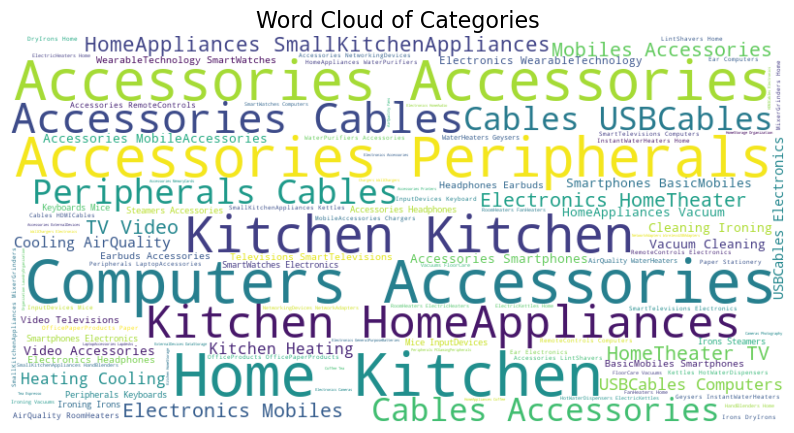

In [68]:
categories_split = df['category'].str.split('|', expand=True).stack()

category_text = ' '.join(categories_split)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories', fontsize=16)
plt.show()

In [70]:
def map_category(category):
    if 'electronics' in category.lower():
        return 'Electronics'
    elif 'kitchen' in category.lower() or 'appliance' in category.lower():
        return 'Kitchen Appliances'
    elif 'home' in category.lower() or 'accessories' in category.lower():
        return 'Home Accessories'
    elif 'computer' in category.lower() or 'accessory' in category.lower():
        return 'Computer Accessories'
    elif 'office' in category.lower():
        return 'Office Products'
    elif 'toy' in category.lower() or 'game' in category.lower():
        return 'Toys and Games'
    else:
        return 'Others'

df['broad_category'] = df['category'].apply(map_category)

,category,broad_category
0,Computers&Accessories|Accessories&Peripherals|...,Home Accessories
1,Computers&Accessories|Accessories&Peripherals|...,Home Accessories
2,Computers&Accessories|Accessories&Peripherals|...,Home Accessories
3,Computers&Accessories|Accessories&Peripherals|...,Home Accessories
4,Computers&Accessories|Accessories&Peripherals|...,Home Accessories


In [71]:
df['broad_category'].value_counts()

broad_category
Electronics           530
Home Accessories      455
Kitchen Appliances    447
Office Products        27
Others                  2
Toys and Games          1
Name: count, dtype: int64

In [77]:
category_rating = df.groupby('broad_category')['rating'].mean().reset_index()
category_rating

,broad_category,rating
0,Electronics,4.084528
1,Home Accessories,4.154945
2,Kitchen Appliances,4.040716
3,Office Products,4.288889
4,Others,3.900000
5,Toys and Games,4.300000


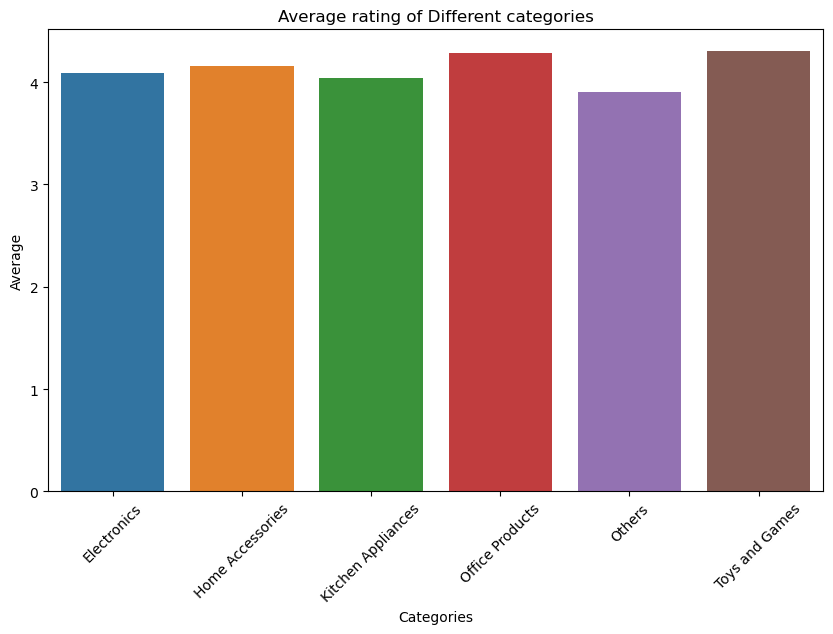

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(data=category_rating, x='broad_category', y='rating', hue='broad_category')
plt.xlabel('Categories')
plt.ylabel('Average')
plt.title('Average rating of Different categories')
plt.xticks(rotation = 45)
plt.show()

## Q3 - Is there a correlation between discount percentage and product rating?

In [80]:
correlation = df['discount_percentage'].corr(df['rating'])
correlation

-0.15567900856041994

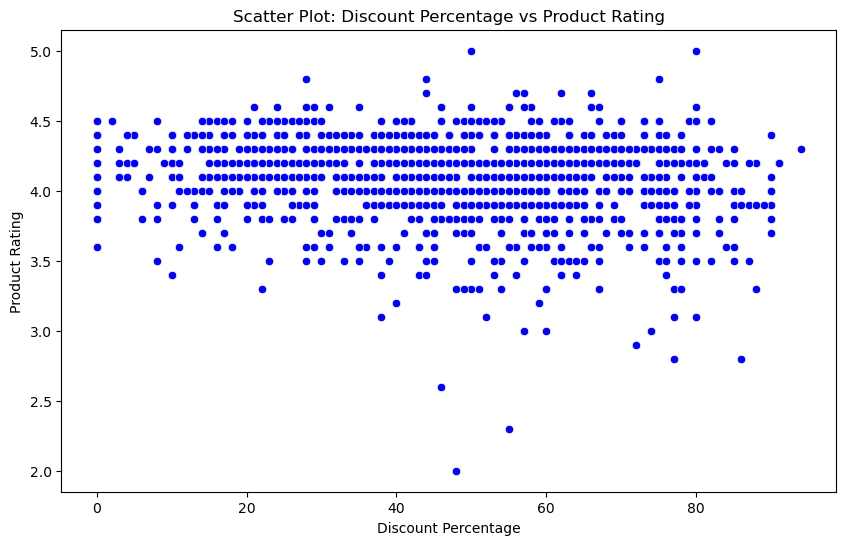

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discount_percentage', y='rating', color='blue')
plt.title('Scatter Plot: Discount Percentage vs Product Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Rating')
plt.show()

## Q4 - What are the top 5 most reviewed products, and what insights do their reviews offer?

In [91]:
df['review_count'] = df['review_id'].str.split(',').apply(len)
df['review_count'] = pd.to_numeric(df['review_count'])

In [92]:
df['review_count']

0       8
1       8
2       8
3       8
4       8
       ..
1460    8
1461    8
1462    8
1463    8
1464    8
Name: review_count, Length: 1462, dtype: int64

In [104]:
review_counts = df.groupby('product_id')['review_count'].sum().head(5).reset_index()
review_counts


,product_id,review_count
0,B002PD61Y4,16
1,B002SZEOLG,8
2,B003B00484,8
3,B003L62T7W,8
4,B004IO5BMQ,8


C:\Users\vinay\AppData\Local\Temp\ipykernel_1148\4240624543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=review_counts, x='product_id', y='review_count', palette= 'Set2')


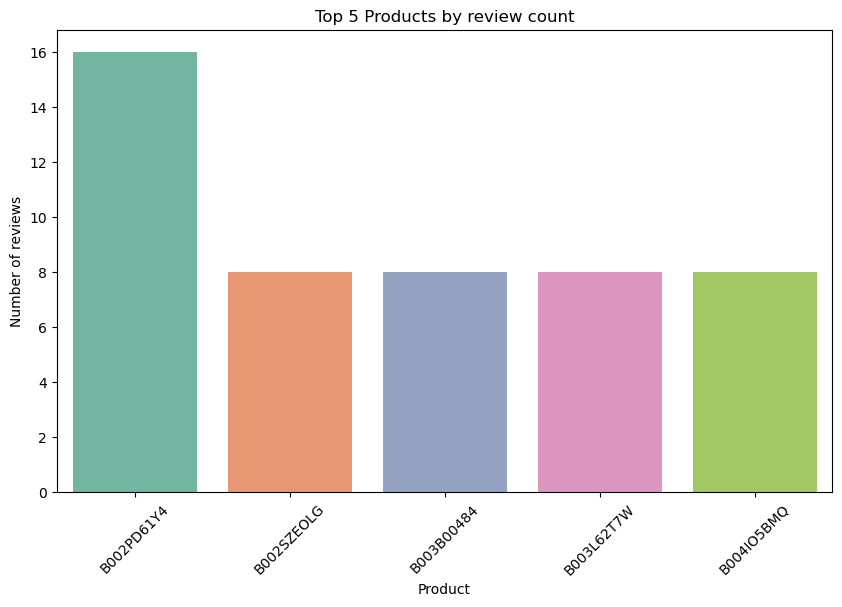

In [110]:
plt.figure(figsize=(10,6))
sns.barplot(data=review_counts, x='product_id', y='review_count', palette= 'Set2')
plt.xlabel('Product')
plt.ylabel('Number of reviews')
plt.title('Top 5 Products by review count')
plt.xticks(rotation = 45)
plt.show()

## Q5 - Are certain product categories more frequently discounted?

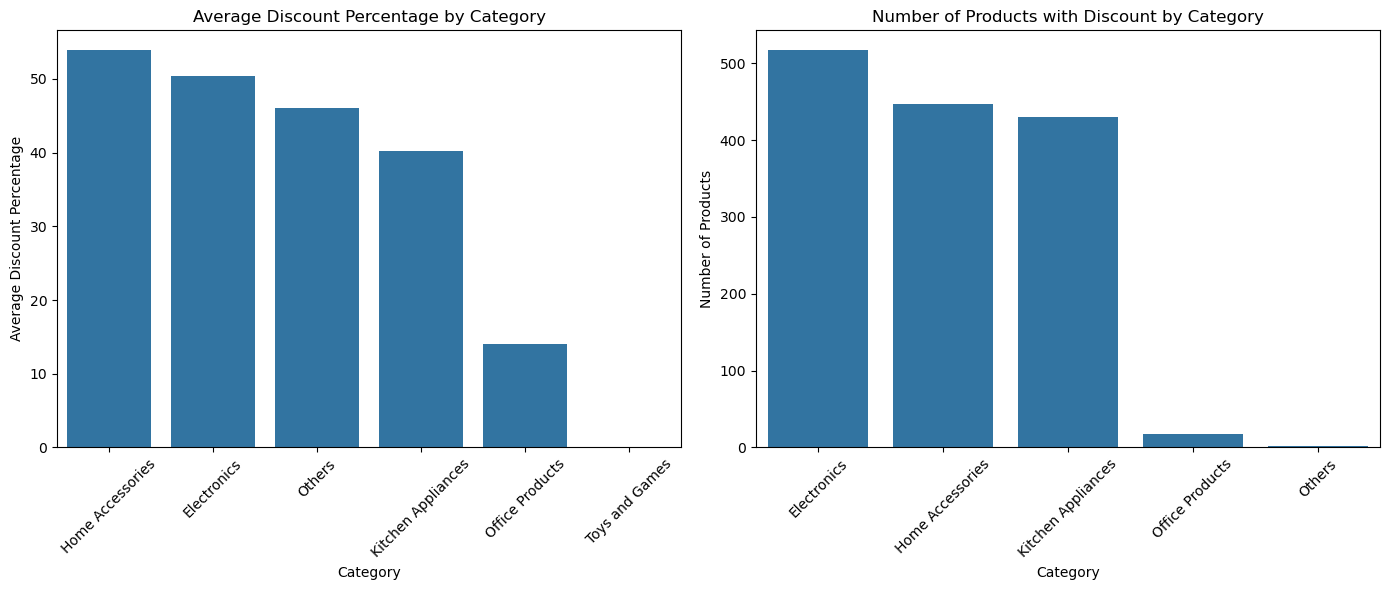

In [114]:
category_discount_avg = df.groupby('broad_category')['discount_percentage'].mean().sort_values(ascending=False)

category_discount_count = df[df['discount_percentage'] > 0].groupby('broad_category').size()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=category_discount_avg.index, y=category_discount_avg.values, ax=ax1)
ax1.set_title('Average Discount Percentage by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Average Discount Percentage')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(x=category_discount_count.index, y=category_discount_count.values, ax=ax2)
ax2.set_title('Number of Products with Discount by Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Number of Products')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Q6 - Do higher-priced products tend to receive higher ratings?

In [116]:
df[['actual_price','rating']]

,actual_price,rating
0,1099.0,4.2
1,349.0,4.0
2,1899.0,3.9
3,699.0,4.2
4,399.0,4.2
...,...,...
1460,919.0,4.0
1461,3045.0,4.1
1462,3080.0,3.6
1463,1890.0,4.0


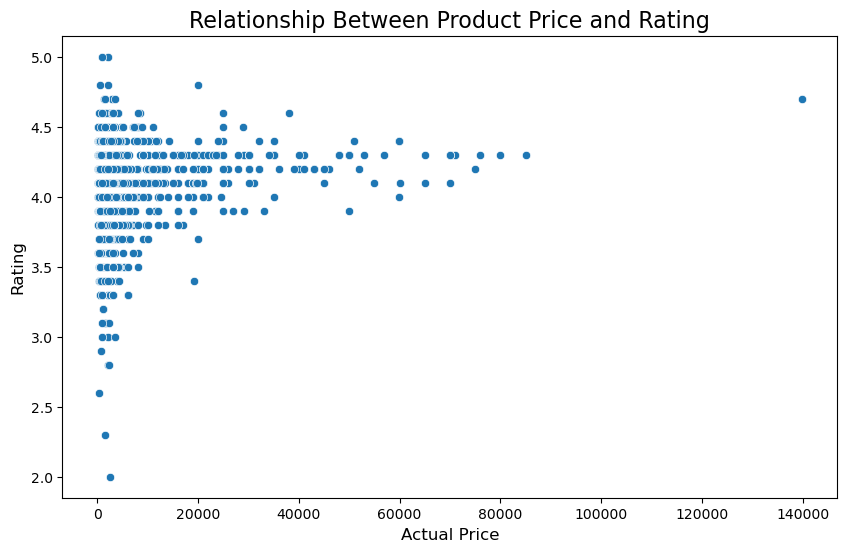

In [125]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x='actual_price', y='rating')
plt.title('Relationship Between Product Price and Rating', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

## Q7 - Is there a relationship between description length and price or rating?

In [128]:
df['len_about'] = df['about_product'].map(lambda x: len(x))

In [129]:
df[['len_about','actual_price','rating']]

,len_about,actual_price,rating
0,960,1099.0,4.2
1,605,349.0,4.0
2,1091,1899.0,3.9
3,699,699.0,4.2
4,574,399.0,4.2
...,...,...,...
1460,423,919.0,4.0
1461,28,3045.0,4.1
1462,297,3080.0,3.6
1463,528,1890.0,4.0


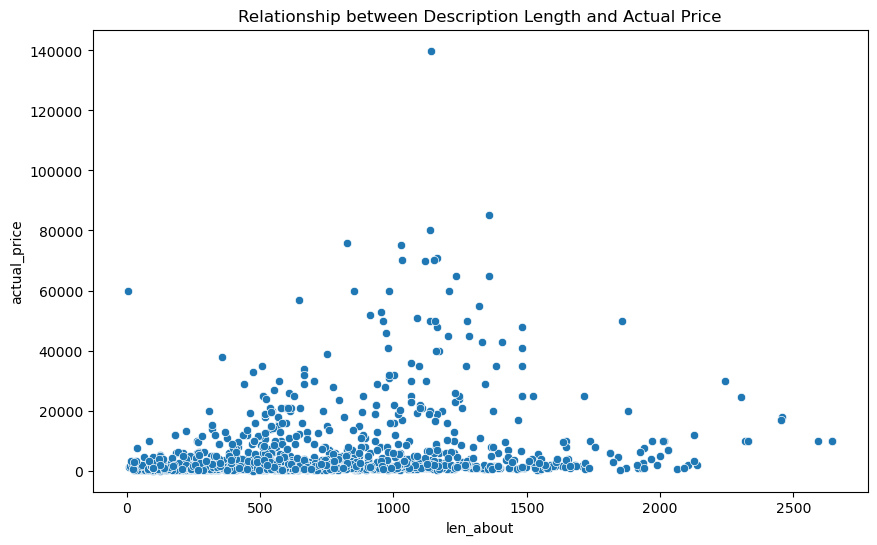

In [138]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='len_about', y='actual_price', data=df)
plt.title('Relationship between Description Length and Actual Price')
plt.show()

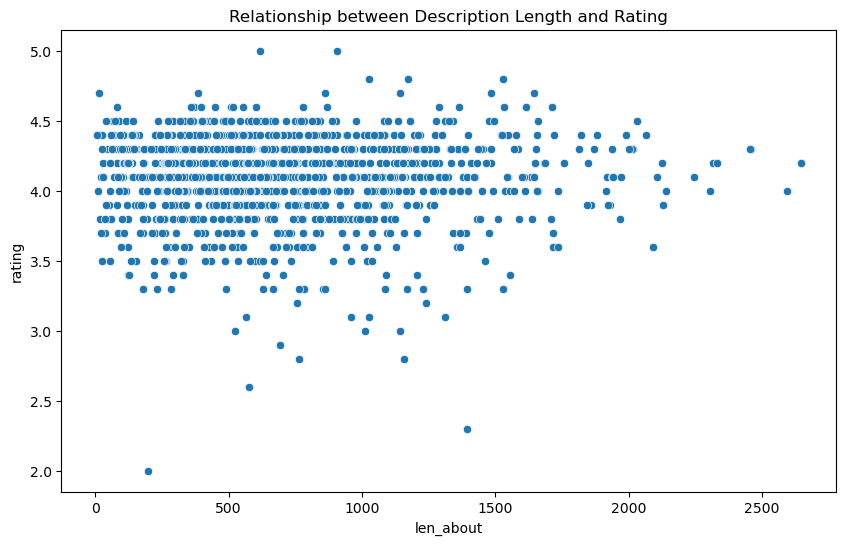

In [139]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='len_about', y='rating', data=df)
plt.title('Relationship between Description Length and Rating')
plt.show()

## Q8 - How do ratings differ between products with high and low review counts?

In [153]:
df[['rating','review_count']]

,rating,review_count
0,4.2,8
1,4.0,8
2,3.9,8
3,4.2,8
4,4.2,8
...,...,...
1460,4.0,8
1461,4.1,8
1462,3.6,8
1463,4.0,8


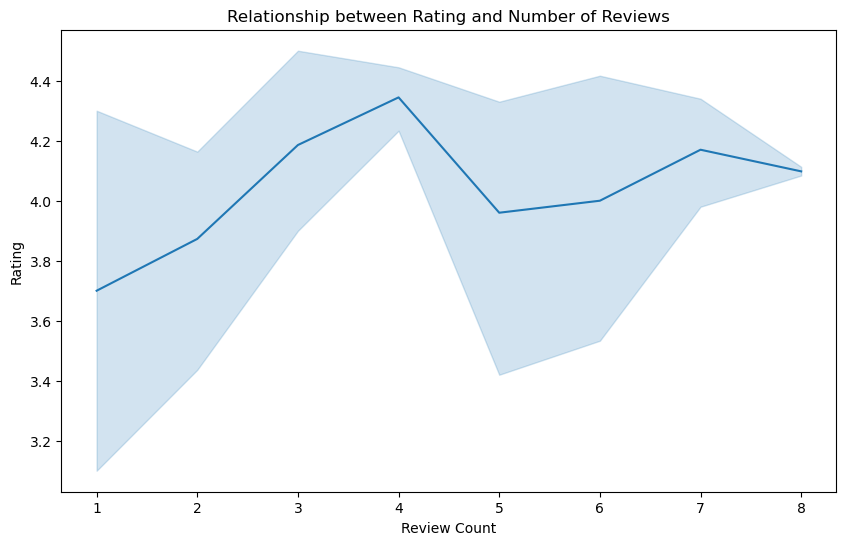

In [149]:
plt.figure(figsize=(10,6))
sns.lineplot(data = df, x='review_count', y='rating')
plt.title('Relationship between Rating and Number of Reviews')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

## Q9 - Are there any discernible seasonal sales or pricing trends?

#### The analysis of seasonal sales or pricing trends is not feasible due to the absence of a date-related column in the dataset. Without a specific column containing timestamps, such as order dates or purchase timestamps, it is impossible to determine the temporal patterns in sales or pricing.

## Q10 - Are there common patterns in products receiving negative reviews?

In [160]:
df.query('rating <= 3')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,broad_category,review_count,len_about
263,B09F6D21BY,7SEVEN Compatible LG TV Remote Suitable for LG...,"Electronics|HomeTheater,TV&Video|Accessories|R...",790.0,1999.0,60,3.0,103.0,for LG TV series All Models of Remote Control ...,"AH7NTBDGAMGOFFADEVWJL3O4YQ2A,AEJUIUF6CYKRBWLSO...","Jarlina Nath,Sona,Ranjit Harchekar,Myneni Sune...","R1S2PH1JD9B9XB,R3UUKCS12Q0B9X,R16YH8SVJU5W61,R...","Not good,No voice recognition, No pointer ray ...",The mouse feature of the remote is not working...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Compatible-Suitable-Cont...,Electronics,8,524
545,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics|WearableTechnology|SmartWatches,281.0,1999.0,86,2.8,87.0,"✅ All-day activity tracking: Track steps, dist...","AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",https://m.media-amazon.com/images/I/41lnTFZGz9...,https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...,Electronics,8,1158
550,B0B82YGCF6,Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...,Electronics|WearableTechnology|SmartWatches,899.0,3499.0,74,3.0,681.0,【Bluetooth Calling Watch】- Tokdis MX-1 Pro ena...,"AFEMYJODFSKRPR4XTYKCPXMCO4YA,AH7PGDCSET6C5NOBB...","Gourav Choudhrani,Mustak ali,Amit,Pankaj solan...","RGEDIZCX7LB34,R19GGFEAAXAUKK,R3L3EFRRM8X2IY,RE...","Its is good but battery life is very poor,Hear...","Its is value for money,,Good product,Good, lik...",https://m.media-amazon.com/images/I/31M4nb0+JK...,https://www.amazon.in/Tokdis-MX-1-Bluetooth-Ca...,Electronics,8,1143
1243,B0BFBNXS94,"Personal Size Blender, Portable Blender, Batte...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,669.0,1499.0,55,2.3,13.0,✔【Easy to carry around】- This handheld blender...,"AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7U...","Manya,Been,Podili Parasuram,Rejoy Jacob,Priya","R1WJ8T3U9P42IU,RM9RH8FX9U95D,R31M8UXT7NLOMY,R1...","Nice product i recommend to buy,Do not buy!! D...","I liked that it is so convenient to carry,Wast...",https://m.media-amazon.com/images/I/417TQs3uro...,https://www.amazon.in/Personal-Blender-Portabl...,Kitchen Appliances,5,1394
1286,B0BNDGL26T,MR. BRAND Portable USB Juicer Electric USB Jui...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,499.0,2199.0,77,2.8,109.0,Portable & Convenient to Charge: This little b...,"AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E...","Yashvant Gote,Nargis Sultana,S.I.KUMAR,Ravi,Lo...","RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...","Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ...",https://m.media-amazon.com/images/I/51pFS9lDzM...,https://www.amazon.in/MR-BRAND-Portable-Electr...,Kitchen Appliances,8,762
1309,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",1299.0,2495.0,48,2.0,2.0,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-ORFin-heater-Hom...,Kitchen Appliances,2,198
1315,B08YK7BBD2,"Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,429.0,999.0,57,3.0,617.0,"【Easy to Use】After installing the battery, you...","AELHZH2PRVKJIVTQMABOTT6LUMBQ,AGNBNAIVJCEB3TBME...","Ritika,ABHISHEK U.,Bhavika,Rekha rana,Balamuru...","R24VRMVVKTZXZU,R2SZR29UV8HPIJ,R34NPCR94RTTCU,R...","Not worth the hype,Gud,Really useful 😃,Product...",Hi

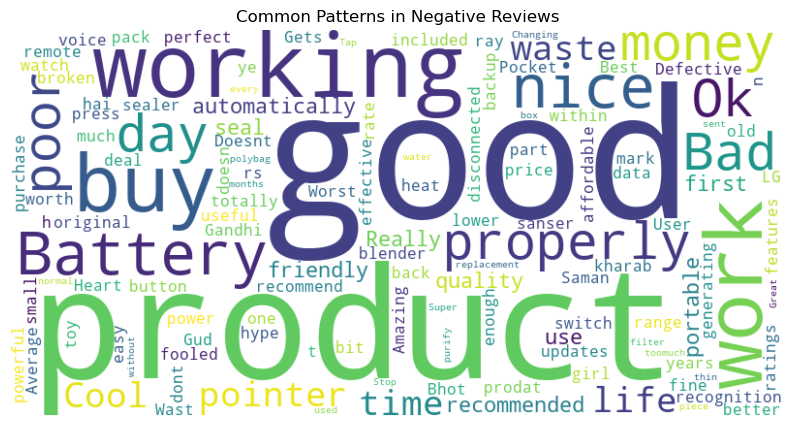

In [237]:
negative_reviews = df[df['rating'] <= 3]

# Extract review content for analysis
negative_review_texts = negative_reviews['review_title'].dropna()

# Use CountVectorizer to find common words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_matrix = vectorizer.fit_transform(negative_review_texts)
common_words = vectorizer.get_feature_names_out()

# Create a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative_review_texts))

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Patterns in Negative Reviews')
plt.show()

In [167]:
# Show top 10 most common negative words
word_counts = word_matrix.toarray().sum(axis=0)
common_word_counts = sorted(zip(common_words, word_counts), key=lambda x: x[1], reverse=True)
print("Top 10 common words in negative reviews:")
for word, count in common_word_counts[:10]:
    print(f"{word}: {count} times")

Top 10 common words in negative reviews:
good: 14 times
product: 13 times
working: 5 times
battery: 4 times
buy: 4 times
nice: 4 times
bad: 3 times
doesn: 3 times
money: 3 times
ok: 3 times


In [169]:
# Analyze negative review distribution across categories
negative_category_counts = negative_reviews['broad_category'].value_counts()
negative_category_counts

broad_category
Kitchen Appliances    6
Electronics           3
Name: count, dtype: int64

## Q11 - Can products be clustered based on features and pricing?

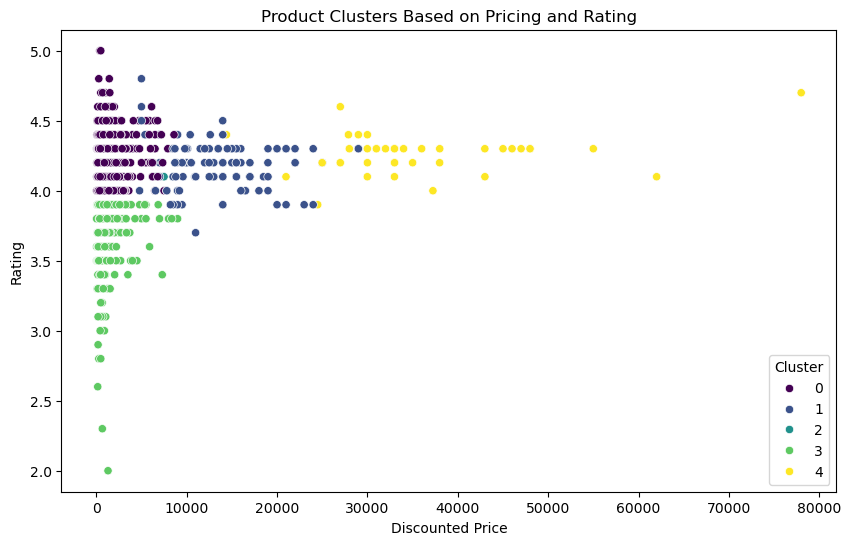

[[-0.28511651 -0.28277342  0.43472196 -0.10777127]
 [ 1.46587797  1.42405627  0.24355102 -0.08187267]
 [-0.2462424  -0.27966111  0.2252536   4.76024151]
 [-0.27952608 -0.26662796 -1.37083482 -0.24257851]
 [ 4.70076406  4.70413136  0.5783929  -0.22834105]]


In [170]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['discounted_price', 'actual_price', 'rating', 'rating_count']]

features = features.dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['discounted_price'], y=df['rating'], hue=df['Cluster'], palette='viridis')
plt.title('Product Clusters Based on Pricing and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

print(kmeans.cluster_centers_)


## Q12 - How does the discount percentage vary across different brands?

In [182]:
df['brand_name'] = df['product_name'].apply(lambda x: x.split()[0] if isinstance(x, str) else '')
df_topbrands = df['brand_name'].value_counts().head(10)

brand_name
boAt            67
Samsung         36
AmazonBasics    33
Portronics      31
Ambrane         29
Bajaj           26
Fire-Boltt      26
Redmi           26
Wayona          24
Amazon          24
Name: count, dtype: int64

In [201]:
df_discount = df.groupby('brand_name')['discount_percentage'].mean().sort_values(ascending=False).head(10).reset_index()
df_discount

,brand_name,discount_percentage
0,rts,94.000000
1,beatXP,90.000000
2,Silicone,90.000000
3,LAPSTER,88.333333
4,Rts™,88.000000
5,SHREENOVA,86.000000
6,Macmillan,86.000000
7,Wembley,85.000000
8,Sounce,84.545455
9,LS,84.000000


C:\Users\vinay\AppData\Local\Temp\ipykernel_1148\1234669055.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_discount, x='brand_name', y='discount_percentage', palette='Set3')


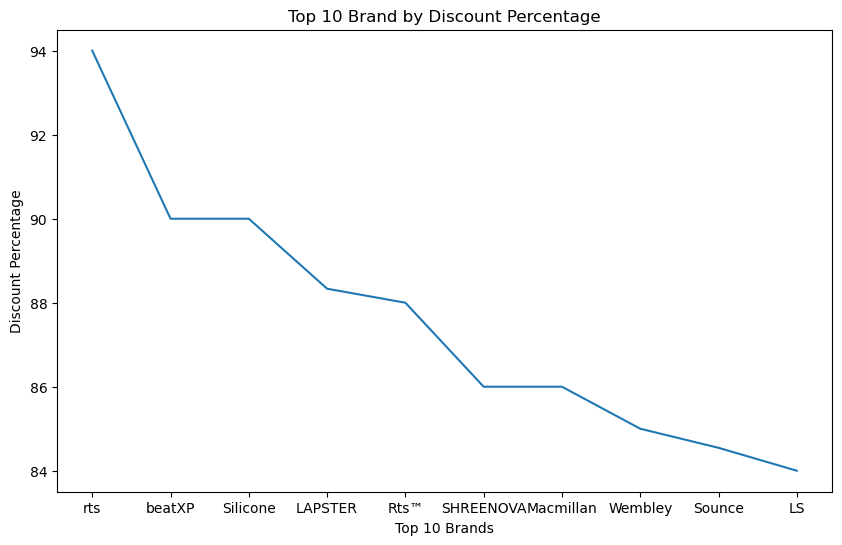

In [207]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_discount, x='brand_name', y='discount_percentage', palette='Set3')
plt.xlabel('Top 10 Brands')
plt.ylabel('Discount Percentage')
plt.title('Top 10 Brand by Discount Percentage')
plt.show()

## Q3 - Is there a relationship between the number of images and sales performance?

In [215]:
df['num_images'] = df['img_link'].apply(lambda x: len(x.split(',')))

In [217]:
correlation = df[['num_images', 'rating_count']].corr()
correlation

,num_images,rating_count
num_images,NaN,NaN
rating_count,NaN,1.0


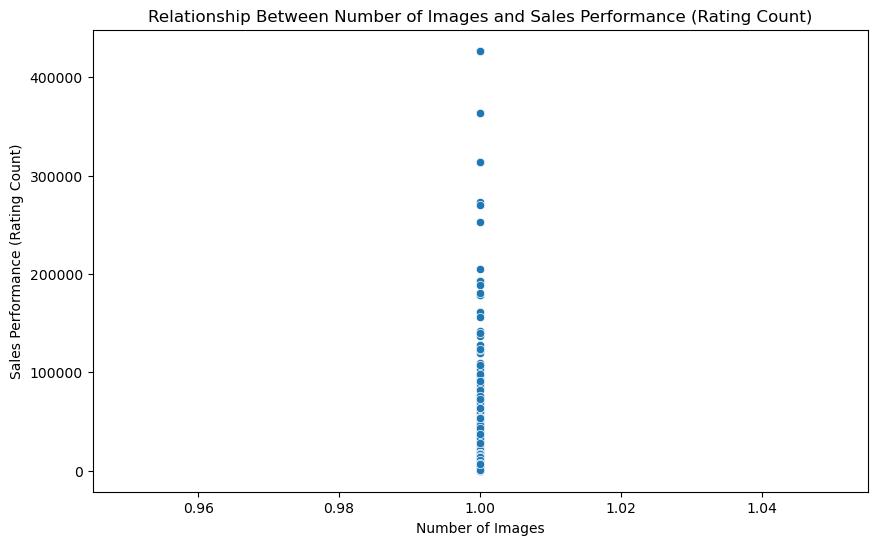

In [218]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_images', y='rating_count', data=df)
plt.title('Relationship Between Number of Images and Sales Performance (Rating Count)')
plt.xlabel('Number of Images')
plt.ylabel('Sales Performance (Rating Count)')
plt.show()

## Q 14- What are common keywords or phrases in product titles or descriptions?

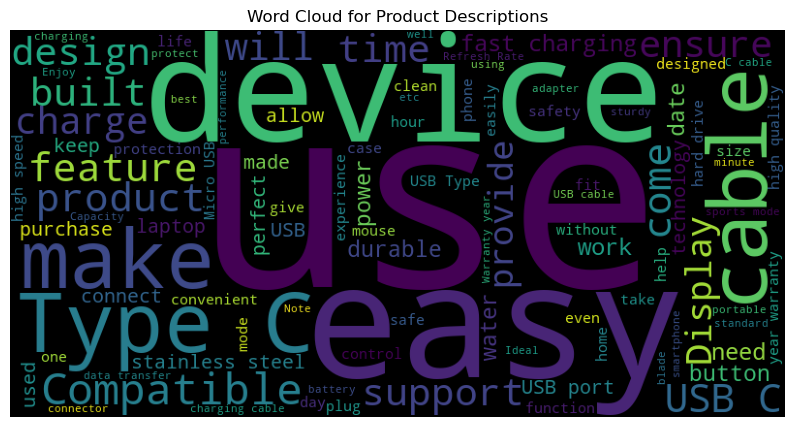

In [231]:
text = ' '.join(df['about_product'].astype(str))

# Step 4: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=None, max_words=100).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Product Descriptions')
plt.show()

## Q15 - Are there regional differences in customer behaviour?

#### No region data in our dataset

## Q16 - Can product rating be predicted based on features and category?

Mean Absolute Error (MAE): 0.1732306029579068
R-squared (R2): 0.2316426867954583


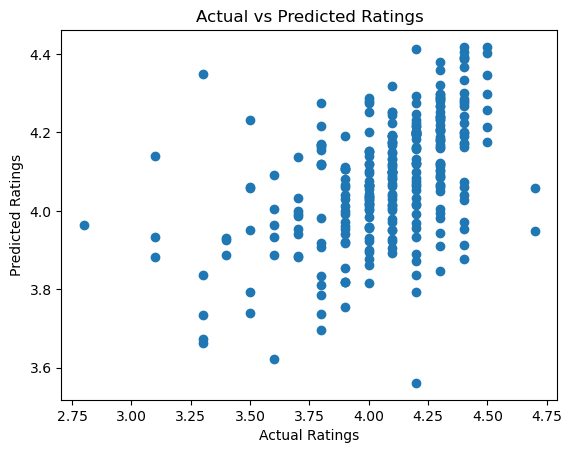

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Encode categorical features (e.g., 'category' and 'brand_name')
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

# Features and target variable
X = df[['category', 'discount_percentage', 'actual_price', 'len_about']]  # Add more features as needed
y = df['rating']

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training (Random Forest Regression)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Model Prediction
y_pred = model.predict(X_test)

# Step 6: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

## Q17 - How can insights from this analysis improve product recommendations?

1. Predicting Customer Preferences:
Targeting by Category: If the analysis reveals that certain categories (e.g., electronics, home accessories) are more highly rated by customers, the recommendation system can prioritize recommending products from those categories for similar users.
Discount Trends: Products with higher discount percentages that still receive favorable ratings might be more attractive to price-sensitive customers. By analyzing the correlation between discount percentages and ratings, the recommendation system can suggest discounted products that have received good customer feedback.
2. Personalized Recommendations Based on Features:
Price Sensitivity: If a model indicates that higher-priced products tend to have better ratings, then for users who have previously purchased high-value items, the system can recommend higher-priced items with better ratings.
Description Length Insights: If products with more detailed descriptions (or specific features) tend to get higher ratings, you can recommend products with detailed descriptions to users who tend to rate items highly.
3. Clustering for Customer Segmentation:
By clustering products based on features such as price, rating, and category, you can create customer segments. For example, customers who prefer premium electronics might be in one cluster, while bargain hunters may be in another. Recommendations can then be tailored to these clusters.
4. Seasonal Recommendations:
If the analysis uncovers seasonal trends in product sales or pricing, the recommendation system can adjust based on the time of year. For instance, products with higher ratings during the holiday season can be promoted as the holiday approaches.
5. Review-Based Insights:
Review Sentiment Analysis: Insights from negative reviews can help recommend products with fewer common complaints. If the analysis reveals common issues with certain products (e.g., poor quality or missing features), the recommendation system can avoid recommending these items to customers.
Products that have received high engagement in reviews (either positive or negative) can be promoted as top-rated or "trending" products.
6. Enhancing Trust and Transparency:
Using product ratings and reviews as part of the recommendation system can increase user trust. For example, if a product has received a high rating across multiple reviews, the recommendation system can prioritize it, showing customers the social proof they often seek when making purchasing decisions.
7. Improved Cross-Selling and Upselling:
If the analysis shows that certain products with specific ratings or price points are frequently bought together, the system can recommend complementary or more expensive alternatives (upsell) or less expensive options (cross-sell) based on the user's historical behavior.
8. Brand Loyalty:
If certain brands consistently perform well in terms of rating and sales, the system can recommend products from those brands to customers who have previously bought from them or expressed a preference for those brands.
Final Thoughts:
Incorporating these insights into a recommendation system makes the recommendations more personalized, relevant, and aligned with customer preferences. As a result, the chances of customer satisfaction and conversion increase, leading to higher sales and a more efficient recommendation process. The system can continually improve by learning from user interactions and reviews, making it more adept at predicting what users will find valuable.

## Q18 - What are the limitations of this dataset and analysis?


The limitations of this dataset and analysis include:

1. Missing Data: Some fields like product descriptions, ratings, or pricing might be incomplete or missing for certain products.
2. No Time Component: The dataset lacks temporal data, preventing the analysis of trends over time (e.g., seasonal sales patterns).
3. No Customer Demographics: Without customer-related information, personalized recommendations cannot be accurately generated.
4. Limited Features: The dataset may not include other influential features like product origin, manufacturing details, or customer purchase history, which could enhance insights.
5. Potential Bias: Reviews and ratings can be biased, either positively or negatively, affecting the accuracy of conclusions drawn.

## Q19 - What additional data sources could enhance this analysis?

Additional data sources that could enhance the analysis include:

1. Customer Demographics: Age, location, and purchasing history for personalized insights.
2. Sales Data Over Time: To analyze trends and seasonality.
3. Competitor Data: Pricing and reviews from competitors.
4. Product Reviews from Other Platforms: Broader feedback beyond Amazon.
5. Inventory and Stock Levels: To understand stock impact on sales.
6. Product Return Rates: To analyze product quality or dissatisfaction.
7. Clickstream Data: Insights into customer engagement on product pages.

## Q20 - How can findings from this EDA inform marketing and pricing strategies?

Findings from this EDA can inform marketing and pricing strategies in the following ways:

1. Targeted Discounts: Identifying product categories that are frequently discounted can help create targeted promotions.
2. Customer Segmentation: Analyzing product ratings and reviews can help segment customers based on preferences and tailor marketing campaigns.
3. Price Optimization: Understanding the relationship between pricing, ratings, and sales performance can guide competitive pricing strategies.
4. Product Recommendations: Insights from product descriptions and features can help recommend similar or complementary products to customers.
5. Seasonal Campaigns: Identifying seasonal sales trends can help in planning timely marketing campaigns to capitalize on demand spikes.

#### Saved cleaned data for furthur Visualization

In [236]:
df.to_csv('cleaned_data.csv', index=False)